Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48

=== RLGA - Số người bán hàng (m) = 1 ===
Generation 0: Total distance = 1565.68, Max route = 1565.68, Pc = 0.70, Pm = 0.050


C:\Users\ASUS\AppData\Local\Temp\ipykernel_24892\3634401211.py:244: RuntimeWarning: invalid value encountered in scalar divide
  reward = improvement / (abs(self.last_best_fitness) + 1e-6)


Generation 20: Total distance = 1283.25, Max route = 1283.25, Pc = 0.70, Pm = 0.050
Generation 40: Total distance = 1126.85, Max route = 1126.85, Pc = 0.70, Pm = 0.050
Generation 60: Total distance = 1057.89, Max route = 1057.89, Pc = 0.70, Pm = 0.050
Generation 80: Total distance = 982.78, Max route = 982.78, Pc = 0.70, Pm = 0.050
Generation 100: Total distance = 935.12, Max route = 935.12, Pc = 0.70, Pm = 0.050
Generation 120: Total distance = 919.05, Max route = 919.05, Pc = 0.70, Pm = 0.050
Generation 140: Total distance = 875.47, Max route = 875.47, Pc = 0.70, Pm = 0.050
Generation 149: Total distance = 861.78, Max route = 861.78, Pc = 0.70, Pm = 0.050
Tổng quãng đường: 861.78
Chiều dài route dài nhất (Max route length): 861.78
Chênh lệch giữa các route (Balance metric): 0.00
Thời gian thực thi: 3.2830 giây
Số vòng lặp cần thiết để hội tụ: 70
Tốc độ hội tụ: 10.0557 đơn vị/gen
 - Tuyến 1 (861.78): [0, 75, 70, 9, 60, 56, 85, 91, 88, 65, 4, 54, 3, 48, 81, 17, 8, 86, 15, 23, 103, 92, 

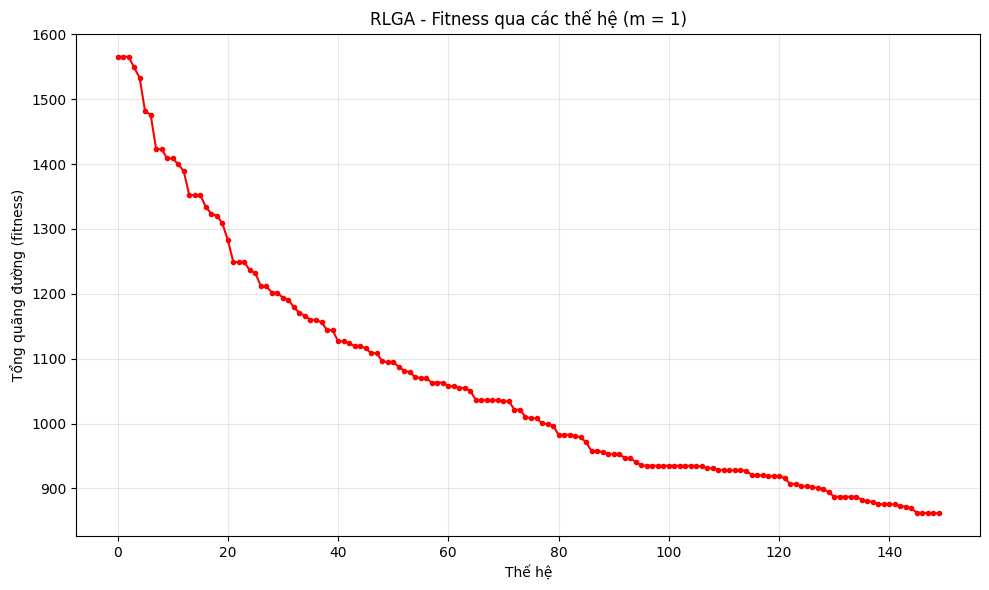


=== RLGA - Số người bán hàng (m) = 2 ===
Generation 0: Total distance = 1674.42, Max route = 906.52, Pc = 0.70, Pm = 0.050
Generation 20: Total distance = 1383.84, Max route = 749.37, Pc = 0.70, Pm = 0.050
Generation 40: Total distance = 1237.86, Max route = 619.70, Pc = 0.70, Pm = 0.050
Generation 60: Total distance = 1147.62, Max route = 575.84, Pc = 0.70, Pm = 0.050
Generation 80: Total distance = 1070.10, Max route = 599.04, Pc = 0.70, Pm = 0.050
Generation 100: Total distance = 998.81, Max route = 526.42, Pc = 0.70, Pm = 0.050
Generation 120: Total distance = 969.49, Max route = 544.67, Pc = 0.70, Pm = 0.050
Generation 140: Total distance = 956.26, Max route = 537.48, Pc = 0.70, Pm = 0.050
Generation 149: Total distance = 951.02, Max route = 537.62, Pc = 0.70, Pm = 0.050
Tổng quãng đường: 951.02
Chiều dài route dài nhất (Max route length): 537.62
Chênh lệch giữa các route (Balance metric): 124.22
Thời gian thực thi: 3.5524 giây
Số vòng lặp cần thiết để hội tụ: 106
Tốc độ hội tụ: 

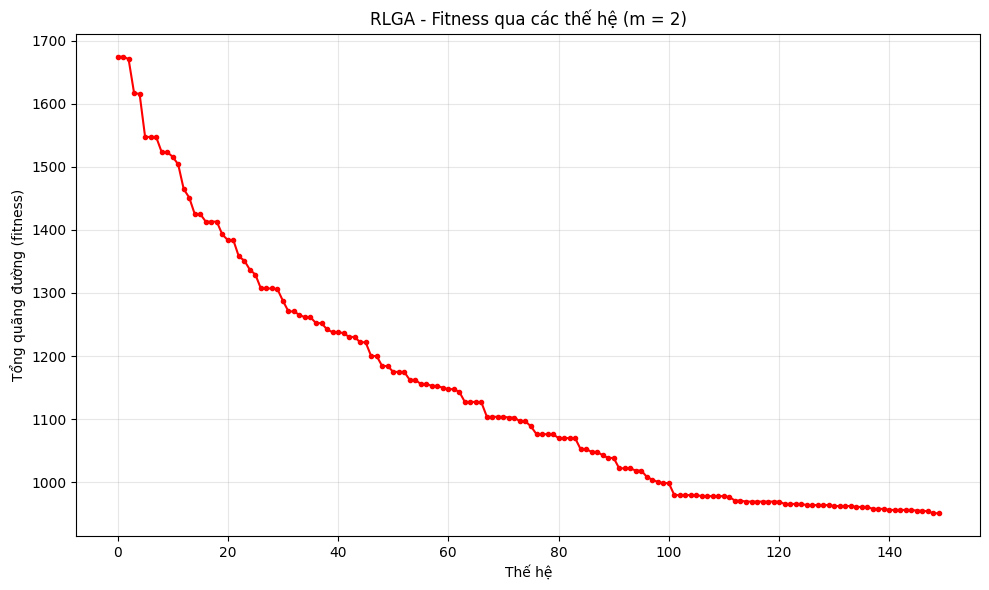


=== RLGA - Số người bán hàng (m) = 3 ===
Generation 0: Total distance = 1736.27, Max route = 615.70, Pc = 0.70, Pm = 0.050
Generation 20: Total distance = 1453.68, Max route = 526.48, Pc = 0.70, Pm = 0.050
Generation 40: Total distance = 1349.23, Max route = 462.07, Pc = 0.70, Pm = 0.050
Generation 60: Total distance = 1221.44, Max route = 412.20, Pc = 0.70, Pm = 0.050
Generation 80: Total distance = 1160.60, Max route = 399.24, Pc = 0.70, Pm = 0.050
Generation 100: Total distance = 1114.00, Max route = 412.62, Pc = 0.70, Pm = 0.050
Generation 120: Total distance = 1080.42, Max route = 374.30, Pc = 0.70, Pm = 0.050
Generation 140: Total distance = 1036.72, Max route = 356.30, Pc = 0.70, Pm = 0.050
Generation 149: Total distance = 1034.67, Max route = 365.22, Pc = 0.70, Pm = 0.050
Tổng quãng đường: 1034.67
Chiều dài route dài nhất (Max route length): 365.22
Chênh lệch giữa các route (Balance metric): 37.35
Thời gian thực thi: 3.5225 giây
Số vòng lặp cần thiết để hội tụ: 74
Tốc độ hội t

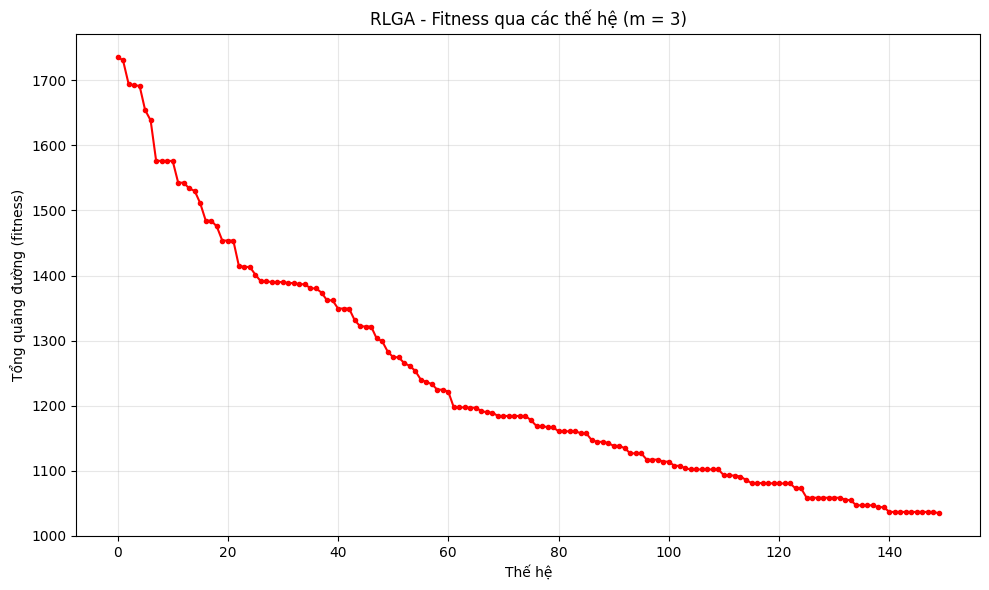

In [2]:
import sys
sys.path.append('../src') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import random
from typing import List, Tuple

class RLGA_mTSP:
    def __init__(self, distance_matrix: np.ndarray, m: int = 3,
                 pop_size: int = 50, generations: int = 150,
                 epsilon: float = 0.1, epsilon_decay: float = 0.99):
        
        self.distance_matrix = distance_matrix
        self.n_cities = len(distance_matrix)
        self.m = m
        self.pop_size = pop_size
        self.generations = generations
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.depot = 0
        
        # RL parameters - simplified
        self.crossover_rates = [0.7, 0.8, 0.9]
        self.mutation_rates = [0.05, 0.1, 0.15]
        
        # Q-table for RL - simplified state representation
        self.Q = {}
        self.current_pc = 0.8
        self.current_pm = 0.1
        
        # Performance tracking
        self.stagnation_count = 0
        self.last_best_fitness = float('inf')

    def initialize_population(self) -> List[List[int]]:
        """Initialize population with random permutations"""
        cities = list(range(1, self.n_cities))  # Exclude depot
        population = []
        for _ in range(self.pop_size):
            individual = cities.copy()
            random.shuffle(individual)
            population.append(individual)
        return population

    def decode_solution(self, chromosome: List[int]) -> List[List[int]]:
        """Decode chromosome into routes for m salesmen"""
        routes = [[] for _ in range(self.m)]
        for i, city in enumerate(chromosome):
            routes[i % self.m].append(city)
        return routes

    def calculate_fitness(self, chromosome: List[int]) -> Tuple[float, float, float]:
        """Calculate fitness metrics: (total_distance, max_route_length, balance_metric)"""
        routes = self.decode_solution(chromosome)
        route_distances = []
        total_distance = 0
        
        for route in routes:
            if len(route) > 0:
                full_route = [self.depot] + route + [self.depot]
                distance = sum(self.distance_matrix[full_route[i]][full_route[i + 1]] 
                             for i in range(len(full_route) - 1))
                route_distances.append(distance)
                total_distance += distance
            else:
                route_distances.append(0)
        
        max_route_length = max(route_distances) if route_distances else 0
        min_route_length = min(route_distances) if route_distances else 0
        balance_metric = max_route_length - min_route_length
        
        return total_distance, max_route_length, balance_metric

    def get_state(self, population_metrics: List[Tuple[float, float, float]]) -> str:
        """Simplified state representation"""
        total_distances = [metrics[0] for metrics in population_metrics]
        diversity = np.std(total_distances)
        improvement = self.last_best_fitness - min(total_distances)
        
        # Discretize into simple states
        diversity_level = "high" if diversity > np.mean(total_distances) * 0.1 else "low"
        improvement_level = "good" if improvement > 0 else "poor"
        
        return f"{diversity_level}_{improvement_level}"

    def select_action(self, state: str) -> Tuple[float, float]:
        """Epsilon-greedy action selection"""
        if state not in self.Q:
            self.Q[state] = {}
            for pc in self.crossover_rates:
                for pm in self.mutation_rates:
                    self.Q[state][(pc, pm)] = 0.0
        
        if random.random() < self.epsilon:
            # Exploration
            return random.choice(self.crossover_rates), random.choice(self.mutation_rates)
        else:
            # Exploitation
            best_action = max(self.Q[state].items(), key=lambda x: x[1])[0]
            return best_action

    def update_q_value(self, state: str, action: Tuple[float, float], reward: float):
        """Update Q-value with simplified Q-learning"""
        alpha = 0.1
        if state not in self.Q:
            self.Q[state] = {}
            for pc in self.crossover_rates:
                for pm in self.mutation_rates:
                    self.Q[state][(pc, pm)] = 0.0
        
        current_q = self.Q[state][action]
        self.Q[state][action] = current_q + alpha * (reward - current_q)

    def tournament_selection(self, population: List[List[int]], 
                           fitness_metrics: List[Tuple[float, float, float]], k: int = 3) -> List[int]:
        """Tournament selection based on total distance"""
        indices = random.sample(range(len(population)), k)
        winner_idx = min(indices, key=lambda i: fitness_metrics[i][0])  # Use total distance
        return population[winner_idx].copy()

    def crossover_ox(self, parent1: List[int], parent2: List[int]) -> Tuple[List[int], List[int]]:
        """Order crossover (OX)"""
        if random.random() > self.current_pc:
            return parent1.copy(), parent2.copy()
        
        size = len(parent1)
        start, end = sorted(random.sample(range(size), 2))
        
        def create_child(p1, p2):
            child = [None] * size
            child[start:end] = p1[start:end]
            
            pointer = 0
            for city in p2:
                if city not in child:
                    while pointer < size and child[pointer] is not None:
                        pointer += 1
                    if pointer < size:
                        child[pointer] = city
            return child
        
        child1 = create_child(parent1, parent2)
        child2 = create_child(parent2, parent1)
        
        return child1, child2

    def mutate_swap(self, chromosome: List[int]) -> List[int]:
        """Swap mutation"""
        child = chromosome.copy()
        if random.random() < self.current_pm:
            i, j = random.sample(range(len(child)), 2)
            child[i], child[j] = child[j], child[i]
        return child

    def local_search_2opt(self, chromosome: List[int]) -> List[int]:
        """Simple 2-opt local search for improvement"""
        best = chromosome.copy()
        best_metrics = self.calculate_fitness(best)
        best_fitness = best_metrics[0]  # Total distance
        
        # Try a few 2-opt moves
        for _ in range(5):
            i, j = sorted(random.sample(range(len(chromosome)), 2))
            if j - i < 2:
                continue
                
            new_chromosome = best.copy()
            new_chromosome[i:j] = reversed(new_chromosome[i:j])
            
            new_metrics = self.calculate_fitness(new_chromosome)
            new_fitness = new_metrics[0]  # Total distance
            if new_fitness < best_fitness:
                best = new_chromosome
                best_fitness = new_fitness
        
        return best

    def run(self) -> Tuple[List[List[int]], float, float, float, List[float]]:
        """Main RLGA algorithm - returns (routes, total_distance, max_route_length, balance_metric, fitness_history)"""
        # Initialize
        population = self.initialize_population()
        best_solution = None
        best_total_distance = float('inf')
        best_max_route_length = float('inf')
        best_balance_metric = float('inf')
        fitness_history = []
        
        for generation in range(self.generations):
            # Evaluate population
            fitness_metrics = [self.calculate_fitness(ind) for ind in population]
            total_distances = [metrics[0] for metrics in fitness_metrics]
            current_best_total = min(total_distances)
            
            # Track best solution
            if current_best_total < best_total_distance:
                best_total_distance = current_best_total
                best_idx = total_distances.index(current_best_total)
                best_solution = self.decode_solution(population[best_idx])
                best_max_route_length = fitness_metrics[best_idx][1]
                best_balance_metric = fitness_metrics[best_idx][2]
                self.stagnation_count = 0
            else:
                self.stagnation_count += 1
            
            fitness_history.append(best_total_distance)
            
            # RL state and action selection
            state = self.get_state(fitness_metrics)
            self.current_pc, self.current_pm = self.select_action(state)
            
            # Create new population
            new_population = []
            
            # Keep best individuals (elitism)
            sorted_indices = sorted(range(len(population)), key=lambda i: total_distances[i])
            elite_count = max(1, self.pop_size // 10)
            for i in range(elite_count):
                new_population.append(population[sorted_indices[i]].copy())
            
            # Generate offspring
            while len(new_population) < self.pop_size:
                parent1 = self.tournament_selection(population, fitness_metrics)
                parent2 = self.tournament_selection(population, fitness_metrics)
                
                child1, child2 = self.crossover_ox(parent1, parent2)
                child1 = self.mutate_swap(child1)
                child2 = self.mutate_swap(child2)
                
                # Apply local search occasionally
                if random.random() < 0.1:
                    child1 = self.local_search_2opt(child1)
                if random.random() < 0.1:
                    child2 = self.local_search_2opt(child2)
                
                new_population.extend([child1, child2])
            
            # Trim to population size
            population = new_population[:self.pop_size]
            
            # Calculate reward and update Q-value
            improvement = self.last_best_fitness - current_best_total
            reward = improvement / (abs(self.last_best_fitness) + 1e-6)
            self.update_q_value(state, (self.current_pc, self.current_pm), reward)
            self.last_best_fitness = current_best_total
            
            # Decay epsilon
            self.epsilon *= self.epsilon_decay
            
            # Print progress
            if generation % 20 == 0 or generation == self.generations - 1:
                print(f"Generation {generation}: Total distance = {best_total_distance:.2f}, "
                      f"Max route = {best_max_route_length:.2f}, "
                      f"Pc = {self.current_pc:.2f}, Pm = {self.current_pm:.3f}")
        
        return best_solution, best_total_distance, best_max_route_length, best_balance_metric, fitness_history

# Load data and run experiments
distance_df = pd.read_csv('../data/HN_distance_matrix.csv', index_col=0)
distance_matrix = distance_df.values

print("Số thành phố:", distance_matrix.shape[0])
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])

def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    if len(generation_fitness) < window:
        return len(generation_fitness)
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    return len(generation_fitness)

# Run experiments for different numbers of salesmen
for m in range(1, 4):
    print(f"\n=== RLGA - Số người bán hàng (m) = {m} ===")
    
    start_time = time.time()
    
    # Create and run RLGA
    rlga = RLGA_mTSP(distance_matrix, m=m, pop_size=50, generations=150)
    routes, total_distance, max_route_length, balance_metric, fitness_per_generation = rlga.run()
    
    end_time = time.time()
    exec_time = end_time - start_time
    
    # Convergence analysis
    converged_gen = detect_convergence(fitness_per_generation)
    convergence_speed = (fitness_per_generation[0] - fitness_per_generation[-1]) / converged_gen if converged_gen > 0 else 0
    
    # Print results - all required metrics
    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Chiều dài route dài nhất (Max route length): {max_route_length:.2f}")
    print(f"Chênh lệch giữa các route (Balance metric): {balance_metric:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp cần thiết để hội tụ: {converged_gen}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")
    
    # Display individual routes
    route_distances = []
    for route in routes:
        if len(route) > 0:
            full_route = [0] + route + [0]
            distance = sum(distance_matrix[full_route[i]][full_route[i+1]] 
                         for i in range(len(full_route)-1))
            route_distances.append(distance)
        else:
            route_distances.append(0)
    
    for i, route in enumerate(routes):
        if len(route) > 0:
            full_route = [0] + route + [0]
            print(f" - Tuyến {i+1} ({route_distances[i]:.2f}): {full_route}")
        else:
            print(f" - Tuyến {i+1} (0.00): [0]")
    
    # Plot fitness evolution
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_per_generation, marker='o', linestyle='-', color='red', markersize=3)
    plt.title(f"RLGA - Fitness qua các thế hệ (m = {m})")
    plt.xlabel("Thế hệ")
    plt.ylabel("Tổng quãng đường (fitness)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()